In [ ]:
from random import randint, random
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from time import sleep

In [ ]:
def draw(p: float, func, fig, ax, low = -10, up = 10) -> None:
    x = np.linspace(low, up, 500)
    y = [func(i) for i in x]
    ax.cla()
    clear_output(wait=True)
    ax.plot(x, y)
    ax.scatter([p], [func(p)])
    display(fig)


def modify(x: float, t: float, low = -10, high = 10) -> float:
    ans = np.random.normal(x, (high - low) * t ** 0.5)
    return max(min(ans, high), low)


def anneal(func, fig, ax, low = -10, high = 10) -> list:
    iterations = 10000

    ans = np.random.uniform(-low, high)
    ans_val = func(ans)

    t0 = 1.0
    for i in range(iterations):
        temp = t0 / np.log(1 + i)

        new_state = modify(ans, temp)
        new_val = func(new_state)

        if new_val < ans_val or random() < np.exp((ans_val - new_val) / temp):
            ans = new_state
            ans_val = new_val
            draw(ans, func, fig, ax)

    return ans


$
f(x) = 1000 \frac{(\frac{tanh x}{10})^3}{x} sin(x)
$

KeyboardInterrupt: 

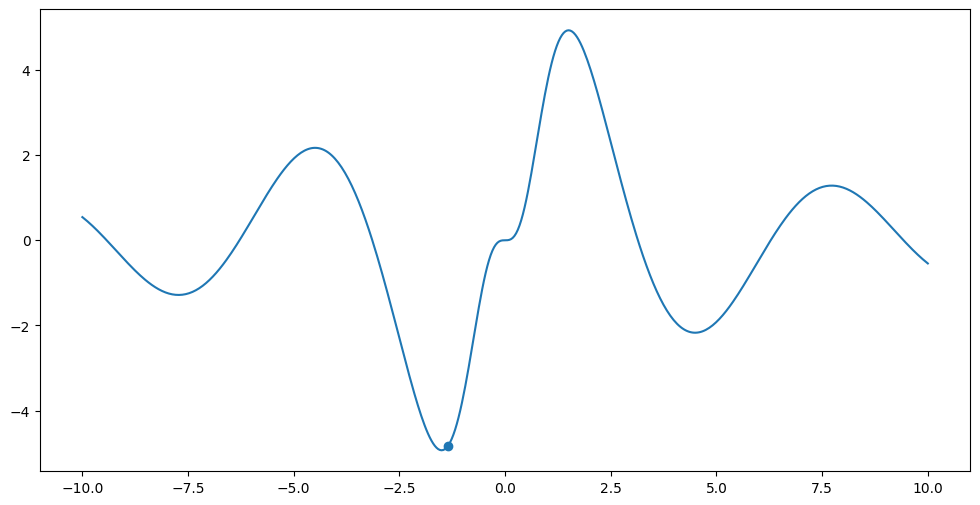

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
anneal(lambda x: 10000 * (np.tanh(x) / 10)**3 / x * np.sin(x), fig, ax)